In [2]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
pn.extension()
import hvplot.pandas
# import io
import seaborn as sns



In [3]:
df = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\\noAge.csv', header='infer', index_col=[0], low_memory=False)
# train = df.head(10000)

nonulls = df.where(df['event_type']>0)
nonulls = nonulls.where(nonulls['age']>0)
df = nonulls.dropna()
# df = df.astype('category')
df.dtypes
finalDat = df[['age','rel_insp_nr','nature_of_inj','part_of_body','src_of_injury','event_type','evn_factor','hum_factor','fatality','event_date','event_keyword']]
# finalDat = finalDat.astype('category')
# finalDat['fatality'] = finalDat['fatality'].astype('object')


In [4]:
# defining filter params to ID high risk situations. 

arbCountvar = 3000

testdict = dict()
for col in finalDat:
    test = []
    val = finalDat.groupby(col)['fatality'].agg(sum).astype('object')
    dic = val.to_dict()
    for i in dic:
        if val[i] > arbCountvar:
            test.append(i)
    testdict.__setitem__(col, test)
testdict['nature_of_inj']
testdict.keys()

### okay, what if we use these keys as a lookup, and basically allow the CSHO to input the 5 factors 
### then need to use "violations issued related to inspection" to structure an output that tells the AO the likelihood that violations will be issued if an inspection is initiated. 


dict_keys(['age', 'rel_insp_nr', 'nature_of_inj', 'part_of_body', 'src_of_injury', 'event_type', 'evn_factor', 'hum_factor', 'fatality', 'event_date', 'event_keyword'])

In [5]:
AccidentInj = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_accident_injury_20221012.csv\osha_accident_injury.csv', low_memory=False)
eventCodes = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\codelist\event_code_list.csv', low_memory=False)
natureCodes = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\codelist\\nature_code_list.csv', low_memory=False)
partCodes = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\codelist\part_code_list.csv', low_memory=False)
srcCodes = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\codelist\src_code_list.csv', low_memory=False)

In [6]:
vio0 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation0.csv', low_memory=False)
vio1 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation1.csv', low_memory=False)
vio2 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation2.csv', low_memory=False)
vio3 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation3.csv', low_memory=False)
vio4 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation4.csv', low_memory=False)
vio5 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation5.csv', low_memory=False)
vio6 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation6.csv', low_memory=False)
vio7 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation7.csv', low_memory=False)
vio8 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation8.csv', low_memory=False)
vio9 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation9.csv', low_memory=False)
vio10 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation10.csv', low_memory=False)
vio11 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation11.csv', low_memory=False)
vio12 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_violation_20221012.csv\osha_violation12.csv', low_memory=False)
violations = pd.concat([vio0,vio1,vio2,vio3,vio4,vio5,vio6,vio7,vio8,vio9])

In [7]:
# inspection0 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_inspection_20221012.csv\osha_inspection0.csv', low_memory=False)
# inspection1 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_inspection_20221012.csv\osha_inspection1.csv', low_memory=False)
# inspection2 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_inspection_20221012.csv\osha_inspection2.csv', low_memory=False)
# inspection3 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_inspection_20221012.csv\osha_inspection3.csv', low_memory=False)
# inspection4 = pd.read_csv('F:\Thomas Tatum\Documents\Grad School\intern\Dev\Data\CSV\osha_inspection_20221012.csv\osha_inspection4.csv', low_memory=False)
# Inspection = pd.concat([inspection0, inspection1, inspection2, inspection3, inspection4])

In [8]:
noBlankDesc = finalDat.dropna()
noBlankDesc.dtypes

age              float64
rel_insp_nr      float64
nature_of_inj    float64
part_of_body     float64
src_of_injury    float64
event_type       float64
evn_factor       float64
hum_factor       float64
fatality         float64
event_date        object
event_keyword     object
dtype: object

In [9]:

def getVios(insp):
    violates = []
    violates.append(violations.loc[violations['activity_nr'] == insp, 'standard'])
    return violates



getVios(11590429)




[55    19100022 B02
 56      19040002 A
 57      19040002 A
 Name: standard, dtype: object]

In [10]:
import nltk 
nltk.download('punkt')
import math
import re
from collections import defaultdict

from nltk.probability import FreqDist
from nltk.tokenize.api import TokenizerI
textcol = finalDat['event_keyword']
FreqDist(textcol)


[nltk_data] Downloading package punkt to C:\Users\Thomas
[nltk_data]     Tatum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({'HEART,HEART ATTACK': 178, 'HEART ATTACK': 173, 'EXPLOSION,FIRE,BURN,HEAT,SPRAIN,CHEMICAL,CHEMICAL BURN,CHEMICAL REACTION,CHEMICAL VAPOR': 146, 'BURN,FRACTURE,FIRE,EXPLOSION,REFINERY,SPRAIN': 104, 'OBSTRUCTED EGRESS,WORK RULES,HYDRAULIC FLUID,COOKER,EVACUATION,REPAIR,FIRE,LOCKOUT,HIGH PRESSURE,HIGH TEMPERATURE': 87, 'ELEC PROTECT EQUIP,OVERHEAD POWER LINE,ELECTRICAL,POWER LINE WORKER,ELECTROCUTED,E PTD,ELEC UTILITY WORK,AERIAL LIFT': 82, 'WORKPLACE VIOLENCE': 80, 'BURN,ALARM,FIRE,FIRE ESCAPE,SMOKE,UNTRAINED,SMOKE INHALATION': 75, 'RESPIRATORY,WORK RULES,INHALATION,SMOKE,SMOKING,SMOKE INHALATION': 72, 'NAUSEA,DIZZINESS,OVEREXPOSURE,PESTICIDE,VOMIT': 70, ...})

In [11]:
from nltk.tokenize import sent_tokenize
txt = textcol[1233].replace(",",". ")
tok = sent_tokenize(txt)
print(tok)
fd=FreqDist(tok)
fd
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.sent_tokenize(column)
    return tokens    


df['tokenized'] = df.apply(lambda x: tokenize(x['event_keyword'].replace(",",". ")),axis=1)

### AAAND WE HAVE TEXT DATA!!!!!!!

['AMMONIA.', 'VENTING.', 'TOXIC ATMOSPHERE.', 'EQUIPMENT FAILURE.', 'RUPTURE.', 'GAS LEAK.', 'TOXIC FUMES.', 'OVEREXPOSURE']


C:\Users\Thomas Tatum\AppData\Local\Temp\ipykernel_15136\2810448548.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df.apply(lambda x: tokenize(x['event_keyword'].replace(",",". ")),axis=1)


In [12]:
# wait isn't the keyword column already tokenized????
# fuck


## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
kwds = df['event_keyword'].to_dict()


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

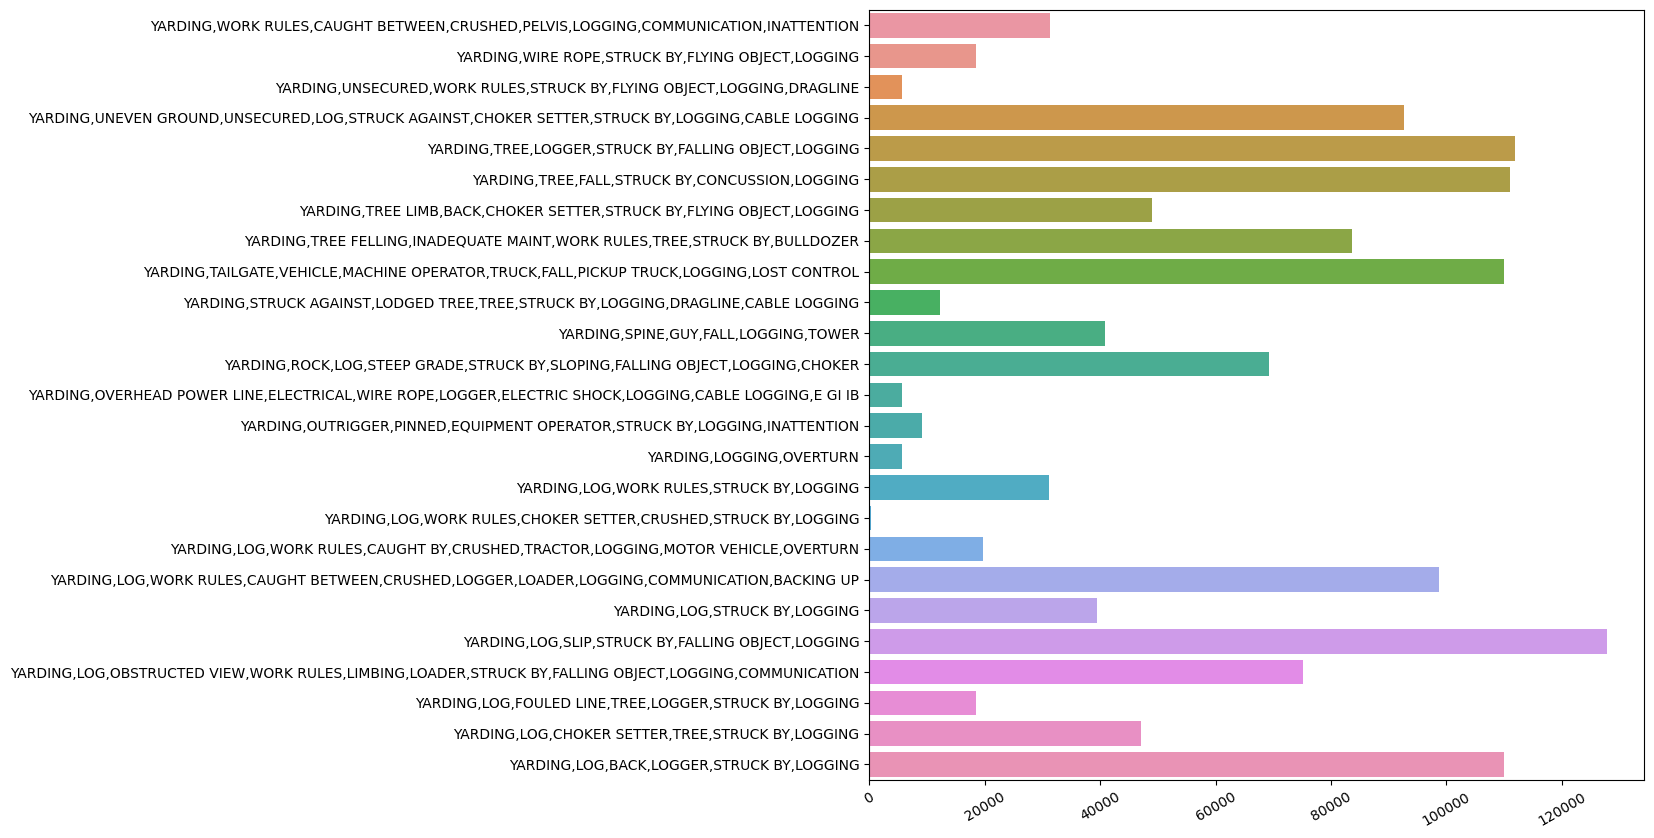

In [13]:

# fatkwds = df['event_keyword'].where(df['fatality']==1)
fd30 = FreqDist(kwds).most_common(30)
# fdFat = FreqDist(fatkwds)
fd30 = pd.Series(dict(fd30))
all_fdist = fd30
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
# fdFat.most_common(10)

In [14]:
## Storing NLTK English stop word list + conainter for results
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
kwds_stopped = []

## Check if token in stop word list before adding to new list
for word in kwds:
    if word in stopwords:
        pass
    else:
        kwds_stopped.append(kwds[word])

[nltk_data] Downloading package stopwords to C:\Users\Thomas
[nltk_data]     Tatum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def splitEntry(entry):
    wordlist = entry.split(',')
    return wordlist
splitEntry(kwds_stopped[0])



['FATIGUE',
 'INHALATION',
 'NAUSEA',
 'HEAT EXCHANGER',
 'CARBOXYHEMOGLOBIN',
 'CARBON MONOXIDE']

In [16]:
# okay, let's try this again with just the fatality data and see if we can find any knowledge nuggets in word frequency for fat cases

from collections import Counter
c = Counter()

In [17]:
for i in kwds_stopped:
    c.update(splitEntry(i))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

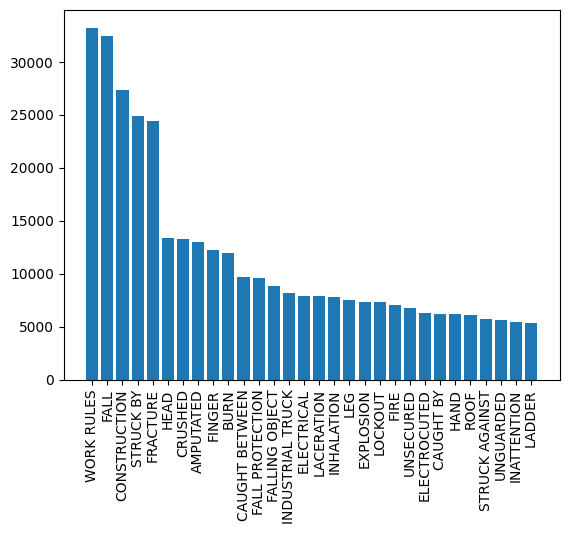

In [18]:
c30 = dict(c.most_common(30))
plt.bar(c30.keys(), c30.values())

plt.xticks(rotation=90)

In [19]:
testkwds = ['FATIGUE',
 'INHALATION',
 'NAUSEA',
 'HEAT EXCHANGER',
 'CARBOXYHEMOGLOBIN',
 'CARBON MONOXIDE']